<a href="https://colab.research.google.com/github/zainmorshed/ComputerVision_bbox/blob/main/Zain_Morshed_Classifying_Clothing_Items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.14.0


In [ ]:
#Load dataset
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
#Split/load data into training and testing sets
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

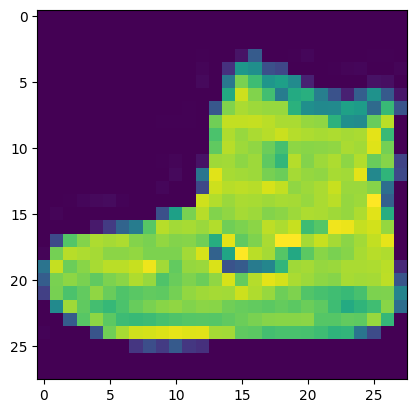

In [ ]:
#Visualize image
#Print image label at index 0
#Print pixel values of image at index 0 (values range from 0-255)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
#Reshape the model to fit the CNN - CNN expects 4D list
#Scale the model
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

training_images = training_images/255.0
test_images = test_images/255.0

In [ ]:
#Design the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])
#Adding a convolutional layer increases the accuracy of the model whilst also minimizing the loss.
#Adding 2 convolutional layers or more will cause the models accuracy to fall causes the loss to increase, so we should stick to one convolutional layer.

In [ ]:
#Building the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.3715 - accuracy: 0.8675
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2504 - accuracy: 0.9085
Epoch 3/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2085 - accuracy: 0.9232
Epoch 4/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1744 - accuracy: 0.9348
Epoch 5/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1444 - accuracy: 0.9466


In [ ]:
#Evaluate the model to see how well it performed
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2468 - accuracy: 0.9140


[0.24678100645542145, 0.9139999747276306]

We can see that the model has a lower accuracy and a higher loss when we evaluate it using the testing data. This is expected, as we are feeding our model data that it hasn't seen before.

In [ ]:
#Predictions
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 4s 14ms/step
[5.8394555e-08 1.6724282e-09 7.1717398e-07 9.3229153e-07 9.6342251e-07
 1.8538038e-04 4.9860795e-08 4.3337626e-04 1.2228194e-06 9.9937731e-01]


In [ ]:
np.argmax(predictions[0])

9

Our model predicts the image at index 0 to be classified under label 9 which corresponds to the image of the ankle boot. Our model has an accuracy of 0.9151 or 91.51% with a loss of 0.2491 or 24.91%. As a result we can predict with 90.76% confidence that the prediction we made is correct.

We will define functions that will allows us to visualize each of the 10 class predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verifying predictions

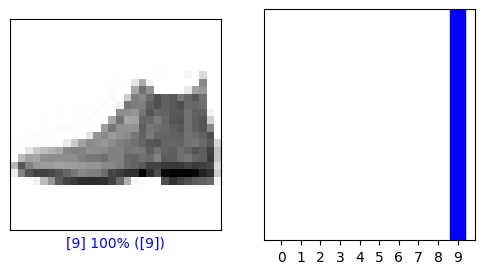

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

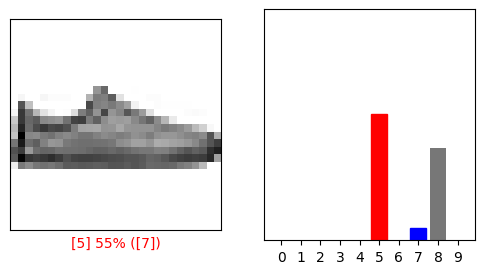

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

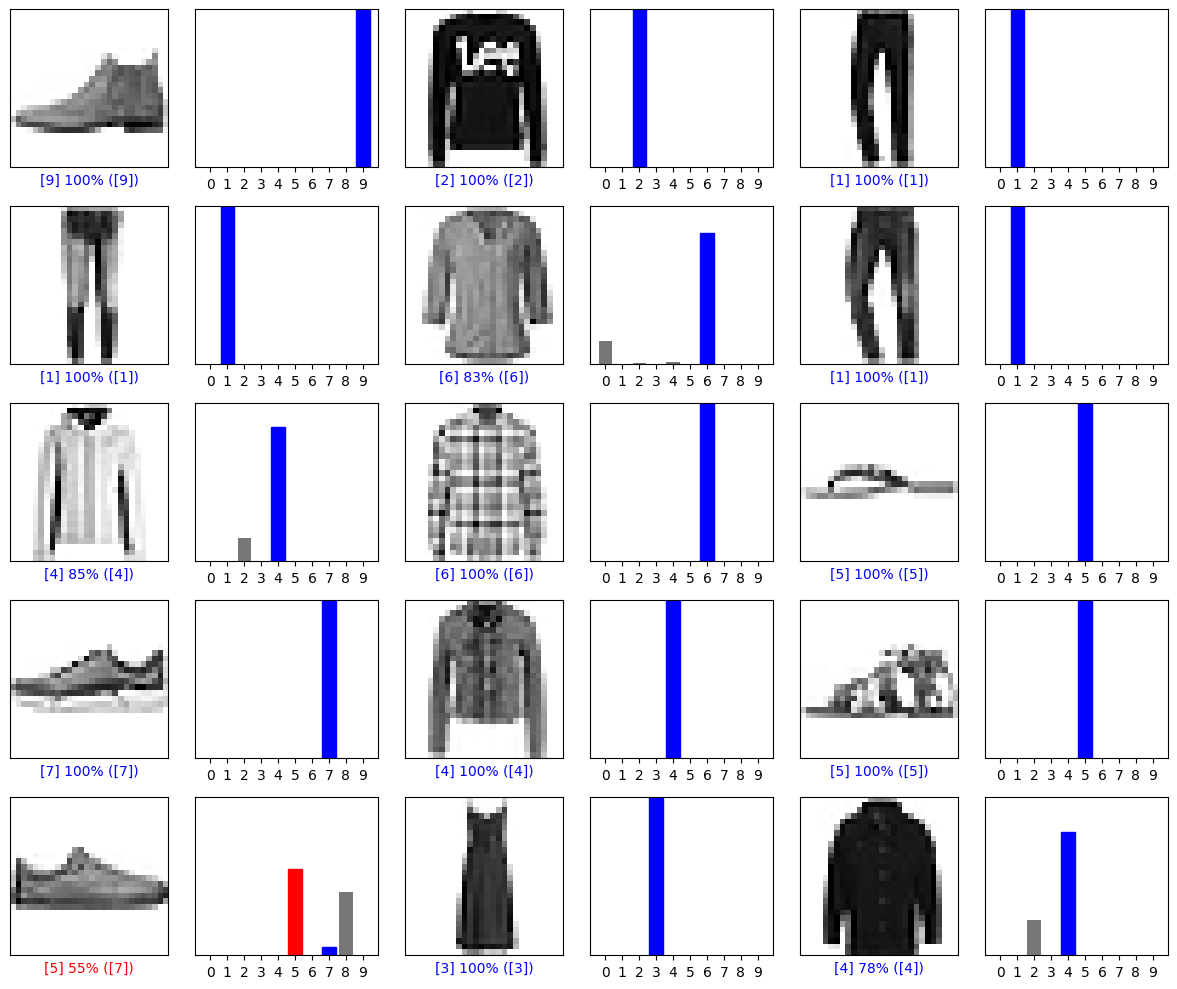

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()